In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

# 1. (методичка стр. 67)

In [56]:
A = 2.
f1 = 50
f2 = 150
f3 = 450
T1 = 1/f1
T2 = 1/f2
T3 = 1/f3
N = 10_000
omega1 = 2 * np.pi * f1
omega2 = 2 * np.pi * f2
omega3 = 2 * np.pi * f3
t = np.linspace(-0.1, 0.1, N)
x_cos = A * np.cos(omega1 * t) + A * np.cos(omega2 * t) + A * np.cos(omega3 * t)

# 2.

In [57]:
def butterworth_down_filter(freqs, cutoff):
    wc = 2 * np.pi * cutoff
    omega = 2 * np.pi * freqs / cutoff
    H = 1 / (-omega**2 + 1j * np.sqrt(2) * omega + 1)
    return H

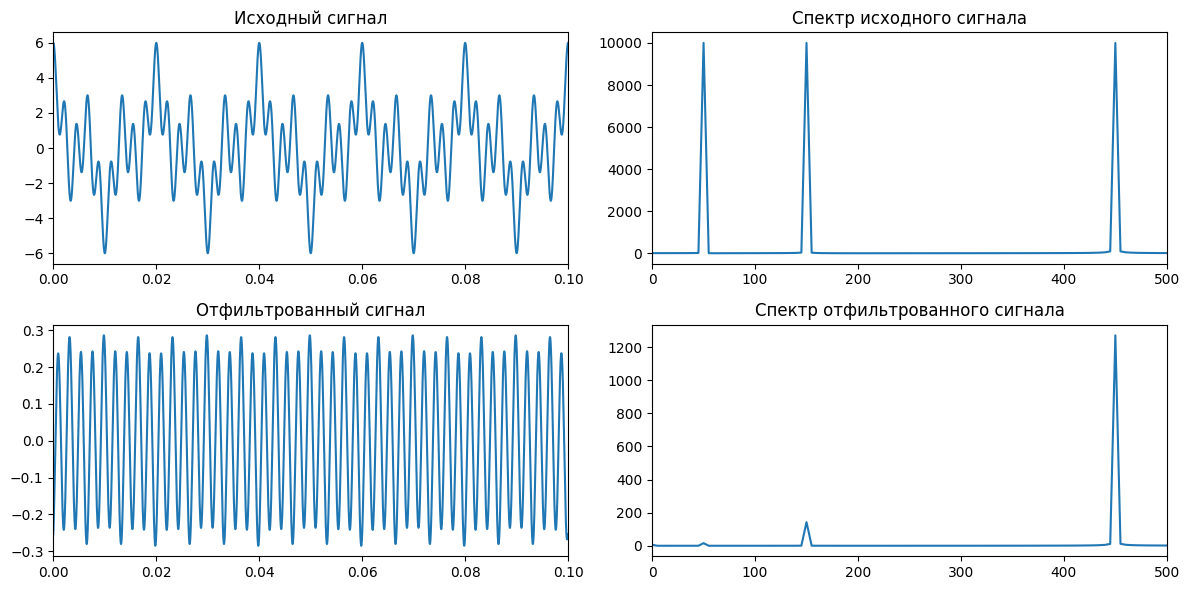

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# Параметры сигнала
fs = 10_000  # Частота дискретизации

# БПФ (FFT) для исходного сигнала
signal_fft = fft(x_cos)
frequencies = fftfreq(t.size, d=t[1]-t[0])

# Применение фильтра Баттерворта
cutoff_freq = 100  # Частота среза
H_down = butterworth_down_filter(frequencies, cutoff_freq)
filtered_signal_fft = signal_fft * H

# Обратное преобразование Фурье для получения отфильтрованного сигнала
filtered_signal = np.real(ifft(filtered_signal_fft))
filtered_signal_fft = fft(filtered_signal)

# Графики
plt.figure(figsize=(12, 6))

# Исходный сигнал
plt.subplot(2, 2, 1)
plt.plot(t, x_cos)
plt.xlim(0, .1)
plt.title("Исходный сигнал")

# Спектр исходного сигнала
plt.subplot(2, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)
plt.title("Спектр исходного сигнала")

# Отфильтрованный сигнал
plt.subplot(2, 2, 3)
plt.plot(t, filtered_signal)
plt.xlim(0, .1)
plt.title("Отфильтрованный сигнал")

# Спектр исходного сигнала
plt.subplot(2, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtered_signal_fft[:fs//2]))
plt.xlim(0, 500)
plt.title("Спектр отфильтрованного сигнала")

plt.tight_layout()
plt.show()


# 3.

In [59]:
A = 2.
f1 = 50
f3 = 450
T1 = 1/f1
T2 = 1/f2
T3 = 1/f3
N = 10_000
omega1 = 2 * np.pi * f1
omega3 = 2 * np.pi * f3
t = np.linspace(-0.1, 0.1, N)
x_cos = A * np.cos(omega1 * t) + A * np.cos(omega3 * t)

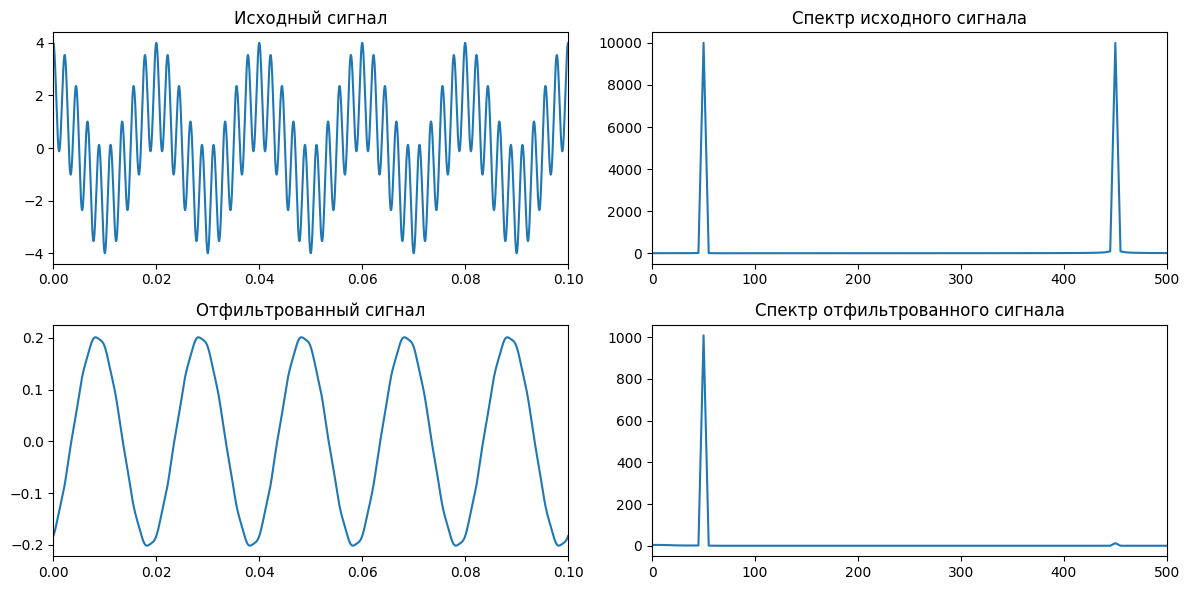

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# Параметры сигнала
fs = 10_000  # Частота дискретизации

# БПФ (FFT) для исходного сигнала
signal_fft = fft(x_cos)
frequencies = fftfreq(t.size, d=t[1]-t[0])

# Применение фильтра Баттерворта
cutoff_freq = 100  # Частота среза
H = butterworth_down_filter(frequencies, cutoff_freq)
filtered_signal_fft = signal_fft * H

# Обратное преобразование Фурье для получения отфильтрованного сигнала
filtered_signal = np.real(ifft(filtered_signal_fft))
filtered_signal_fft = fft(filtered_signal)

# Графики
plt.figure(figsize=(12, 6))

# Исходный сигнал
plt.subplot(2, 2, 1)
plt.plot(t, x_cos)
plt.xlim(0, .1)
plt.title("Исходный сигнал")

# Спектр исходного сигнала
plt.subplot(2, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)
plt.title("Спектр исходного сигнала")

# Отфильтрованный сигнал
plt.subplot(2, 2, 3)
plt.plot(t, filtered_signal)
plt.xlim(0, .1)
plt.title("Отфильтрованный сигнал")

# Спектр исходного сигнала
plt.subplot(2, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtered_signal_fft[:fs//2]))
plt.xlim(0, 500)
plt.title("Спектр отфильтрованного сигнала")

plt.tight_layout()
plt.show()


# 4.

In [61]:
def butterworth_up_filter(freqs, cutoff):
    wc = 2 * np.pi * cutoff
    omega = np.where(freqs != 0, 2 * np.pi * cutoff / freqs, 0.001)
    H = 1 / (-omega**2 + 1j * np.sqrt(2) * omega + 1)
    return H

In [62]:
A = 2.
f1 = 50
f2 = 150
f3 = 450
T1 = 1/f1
T2 = 1/f2
T3 = 1/f3
N = 10_000
omega1 = 2 * np.pi * f1
omega2 = 2 * np.pi * f2
omega3 = 2 * np.pi * f3
t = np.linspace(-0.1, 0.1, N)
x_cos = A * np.cos(omega1 * t) + A * np.cos(omega2 * t) + A * np.cos(omega3 * t)

C:\Users\Ivan K\AppData\Local\Temp\ipykernel_9172\2304726989.py:3: RuntimeWarning: divide by zero encountered in divide
  omega = np.where(freqs != 0, 2 * np.pi * cutoff / freqs, 0.001)


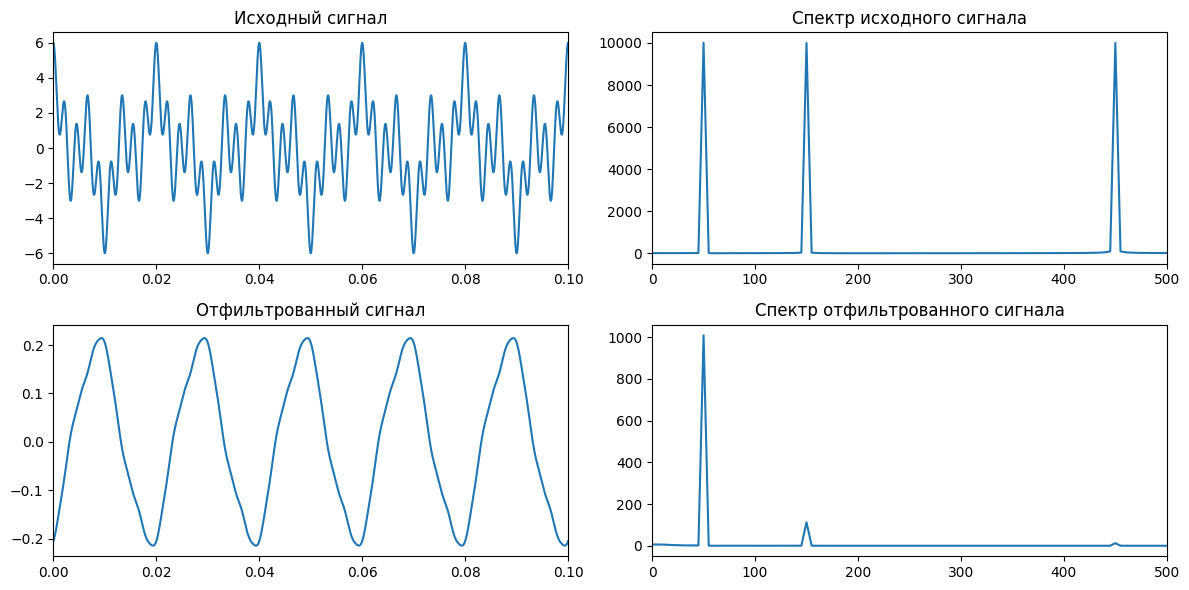

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# Параметры сигнала
fs = 10_000  # Частота дискретизации

# БПФ (FFT) для исходного сигнала
signal_fft = fft(x_cos)
frequencies = fftfreq(t.size, d=t[1]-t[0])

# Применение фильтра Баттерворта
cutoff_freq = 200  # Частота среза
H_up = butterworth_up_filter(frequencies, cutoff_freq)
filtered_signal_fft = signal_fft * H

# Обратное преобразование Фурье для получения отфильтрованного сигнала
filtered_signal = np.real(ifft(filtered_signal_fft))
filtered_signal_fft = fft(filtered_signal)

# Графики
plt.figure(figsize=(12, 6))

# Исходный сигнал
plt.subplot(2, 2, 1)
plt.plot(t, x_cos)
plt.xlim(0, .1)
plt.title("Исходный сигнал")

# Спектр исходного сигнала
plt.subplot(2, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)
plt.title("Спектр исходного сигнала")

# Отфильтрованный сигнал
plt.subplot(2, 2, 3)
plt.plot(t, filtered_signal)
plt.xlim(0, .1)
plt.title("Отфильтрованный сигнал")

# Спектр исходного сигнала
plt.subplot(2, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtered_signal_fft[:fs//2]))
plt.xlim(0, 500)
plt.title("Спектр отфильтрованного сигнала")

plt.tight_layout()
plt.show()


# 5.

In [66]:
A = 2.
f1 = 50
f2 = 150
f3 = 450
T1 = 1/f1
T2 = 1/f2
T3 = 1/f3
N = 10_000
omega1 = 2 * np.pi * f1
omega2 = 2 * np.pi * f2
omega3 = 2 * np.pi * f3
t = np.linspace(-0.1, 0.1, N)
x_cos = A * np.cos(omega1 * t) + A * np.cos(omega2 * t) + A * np.cos(omega3 * t)
signal_fft = fft(x_cos)
frequencies = fftfreq(t.size, d=t[1]-t[0])

In [65]:
H_down = butterworth_down_filter(frequencies, 150)
H_up = butterworth_up_filter(frequencies, 150)
bpf = H_down * H_up
sf = H_down + H_up

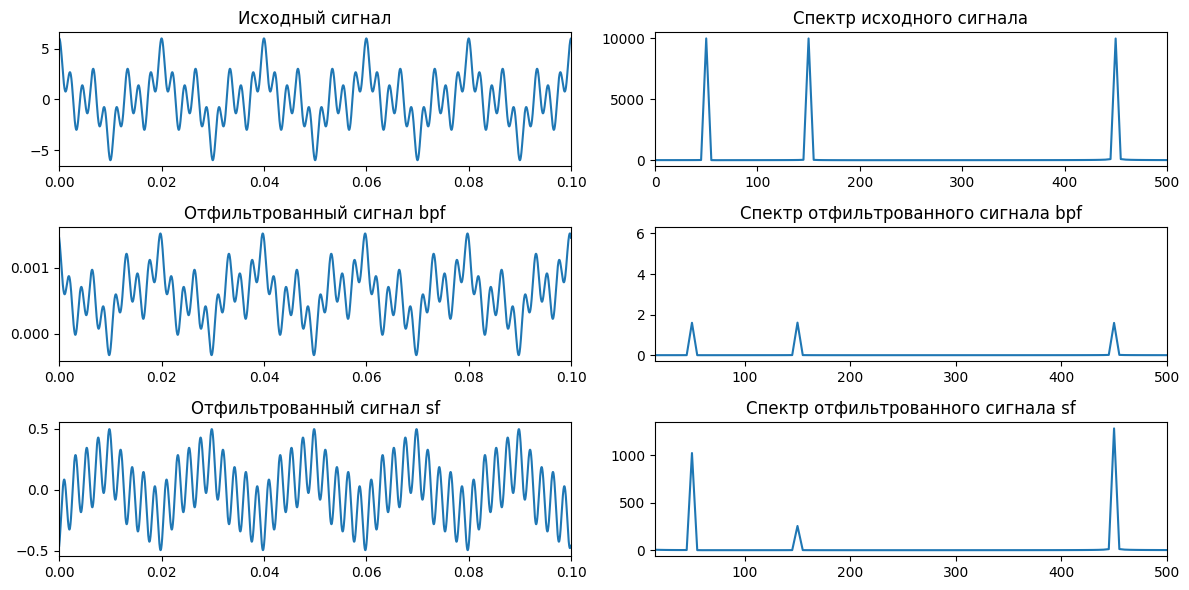

In [68]:
filtered_signal_fft_bpf = signal_fft * bpf
filtered_signal_fft_sf = signal_fft * sf

# Обратное преобразование Фурье для получения отфильтрованного сигнала
filtered_signal_bpf = np.real(ifft(filtered_signal_fft_bpf))
filtered_signal_fft_bpf = fft(filtered_signal_bpf)

filtered_signal_sf = np.real(ifft(filtered_signal_fft_sf))
filtered_signal_fft_sf = fft(filtered_signal_sf)

# Графики
plt.figure(figsize=(12, 6))

# Исходный сигнал
plt.subplot(3, 2, 1)
plt.plot(t, x_cos)
plt.xlim(0, .1)
plt.title("Исходный сигнал")

# Спектр исходного сигнала
plt.subplot(3, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)
plt.title("Спектр исходного сигнала")

# Отфильтрованный сигнал
plt.subplot(3, 2, 3)
plt.plot(t, filtered_signal_bpf)
plt.xlim(0, .1)
plt.title("Отфильтрованный сигнал bpf")

# Спектр исходного сигнала
plt.subplot(3, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtered_signal_fft_bpf[:fs//2]))
plt.xlim(15, 500)
plt.title("Спектр отфильтрованного сигнала bpf")

# Отфильтрованный сигнал
plt.subplot(3, 2, 5)
plt.plot(t, filtered_signal_sf)
plt.xlim(0, .1)
plt.title("Отфильтрованный сигнал sf")

# Спектр исходного сигнала
plt.subplot(3, 2, 6)
plt.plot(frequencies[:fs//2], np.abs(filtered_signal_fft_sf[:fs//2]))
plt.xlim(15, 500)
plt.title("Спектр отфильтрованного сигнала sf")

plt.tight_layout()
plt.show()

# 6.

In [ ]:
# S = p/wc = A + j * omega, A = a / wc, omega = w/wc, p = a + jw
def butterworth_down_filter_with_order(freqs, cutoff, order=4):
    pass